## Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emp_train=  pd.read_csv('/content/drive/MyDrive/employee_train.csv')
emp_test=  pd.read_csv('/content/drive/MyDrive/employee_test.csv')

In [ ]:
print(emp_train.shape)
print(emp_test.shape)

(1048, 28)
(210, 27)


## Data Preprocessing

### Remove unnecessary columns

In [ ]:
emp_train.drop(columns=['S.No','comments'],inplace=True)
emp_test.drop(columns=['S.No','comments'],inplace=True)

In [ ]:
print(emp_train.shape)
print(emp_test.shape)

(1048, 26)
(210, 25)


### Change Datatype

In [ ]:
emp_train['Timestamp']=pd.to_datetime(emp_train['Timestamp'])
emp_test['Timestamp']=pd.to_datetime(emp_test['Timestamp'])

### Data Transformation

In [ ]:
clm_train=['Gender','Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits',
 'care_options', 'wellness_program','seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

clm_test=['Gender','Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits',
 'care_options', 'wellness_program','seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

In [ ]:

replace_gender_train = {
    'M': 'Male','Male': 'Male','male': 'Male','m': 'Male','Male-ish': 'Male','maile': 'Male','Mal': 'Male','Male (CIS)': 'Male','Male ': 'Male','Man': 'Male',
    'Mail': 'Male','msle': 'Male','Malr': 'Male','Guy (-ish) ^_^': 'Male','cis male': 'Male','male leaning androgynous': 'Male', 'Cis Male': 'Male',
    'Make': 'Male',

    'Female': 'Female','female': 'Female','Cis Female': 'Female','F': 'Female','Femake': 'Female','f': 'Female','woman': 'Female','Woman': 'Female',
    'Female (cis)': 'Female','cis-female/femme': 'Female','Female (trans)': 'Female', 'Trans-female': 'Female','Trans woman': 'Female','Female ':'Female',

    'Nah': 'Other','All': 'Other','Enby': 'Other','fluid': 'Other','Genderqueer': 'Other','queer/she/they': 'Other','non-binary': 'Other',
    'something kinda male?': 'Other','queer': 'Other','Androgyne': 'Other','Agender': 'Other','Neuter': 'Other','A little about you': 'Other'
}

replace_gender_test = {'Male': 'Male','female': 'Female','Female': 'Female','M': 'Male','male': 'Male','Male ': 'Male','m': 'Male',
    'p': 'Other', 'F': 'Female','Woman': 'Female','femail': 'Female','Cis Man': 'Male',
    'ostensibly male, unsure what that really means': 'Male',  'f': 'Female'
}


emp_train['Gender'] = emp_train['Gender'].replace(replace_gender_train)
emp_test['Gender'] = emp_test['Gender'].replace(replace_gender_test)

print(emp_train['Gender'].value_counts())
print('\n')
print(emp_test['Gender'].value_counts())


Gender
Male      829
Female    206
Other      13
Name: count, dtype: int64


Gender
Male      164
Female     45
Other       1
Name: count, dtype: int64


In [ ]:
emp_train['no_employees']=emp_train['no_employees'].replace(
                                                   {'25-Jun':np.nan,
                                                    '5-Jan':np.nan,
                                                    'More than 1000':'>1000'})
emp_test['no_employees']=emp_test['no_employees'].replace(
                                                   {'25-Jun':np.nan,
                                                    '5-Jan':np.nan,
                                                    'More than 1000':'>1000'})

In [ ]:
for i in clm_train:
  print(i,':',emp_train[i].unique() )
  print('\n')

Gender : ['Female' 'Male' 'Other']


Country : ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The']


state : ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


self_employed : [nan 'Yes' 'No']


family_history : ['No' 'Yes']


treatment : ['Yes' 'No']


work_interfere : ['Often' 'Rarely' 'Never' 'Sometimes' nan]


no_employees : [nan '>1000' '26-100' '100-500' '500-1000']


remote_work : ['N

In [ ]:
for i in clm_test:
  print(i,":",emp_test[i].unique() )
  print('\n')

Gender : ['Male' 'Female' 'Other']


Country : ['United Kingdom' 'United States' 'Switzerland' 'Canada' 'Germany'
 'South Africa' 'Greece' 'Netherlands' 'France' 'Australia' 'India'
 'Croatia' 'New Zealand' 'Moldova' 'Sweden' 'Belgium' 'Israel' 'Singapore'
 'Poland' 'Colombia' 'Georgia' 'China' 'Bulgaria' 'Italy' 'Ireland'
 'Brazil' 'Czech Republic' 'Philippines' 'Finland']


state : [nan 'WA' 'IL' 'FL' 'TN' 'CA' 'OR' 'NJ' 'UT' 'PA' 'IN' 'OH' 'VA' 'TX' 'AL'
 'WI' 'NY' 'SC' 'MN' 'VT' 'MI' 'NC' 'OK' 'MD']


self_employed : ['Yes' 'No']


family_history : ['Yes' 'No']


work_interfere : ['Sometimes' 'Often' 'Never' 'Rarely' nan]


no_employees : [nan '>1000' '26-100' '500-1000' '100-500']


remote_work : ['Yes' 'No']


tech_company : ['Yes' 'No']


benefits : ['No' 'Yes' "Don't know" nan]


care_options : ['Yes' 'No' 'Not sure']


wellness_program : ['Yes' 'No' "Don't know" nan]


seek_help : ['Yes' 'No' "Don't know"]


anonymity : ['Yes' "Don't know" 'No']


leave : ['Somewhat difficult'

### Handle Null values

In [ ]:
def null_val(dt):
  n=dt.isna().sum()
  n=n[n>0]
  nl=pd.DataFrame()
  nl['Feature']=n.index
  nl['Null_count']=n.values
  nl['%_Null']=nl['Null_count']/dt.shape[0]*100
  return nl

In [ ]:
null_val(emp_train)

,Feature,Null_count,%_Null
0,state,412,39.312977
1,self_employed,18,1.717557
2,work_interfere,236,22.519084
3,no_employees,378,36.068702
4,benefits,13,1.240458
5,wellness_program,4,0.381679
6,leave,4,0.381679


In [ ]:
null_val(emp_test)

,Feature,Null_count,%_Null
0,state,103,49.047619
1,work_interfere,28,13.333333
2,no_employees,73,34.761905
3,benefits,3,1.428571
4,wellness_program,2,0.952381
5,leave,5,2.380952


In [ ]:
emp_train1=emp_train.copy()
emp_test1=emp_test.copy()

In [ ]:
emp_train1['state']=emp_train1['state'].ffill()
emp_test1['state']=emp_test1['state'].ffill()
emp_test1['state']=emp_test1['state'].fillna(emp_test1['state'].mode()[0])

In [ ]:
emp_train1['work_interfere']=emp_train1['work_interfere'].bfill()
emp_test1['work_interfere']=emp_test1['work_interfere'].bfill()

In [ ]:
emp_train1['no_employees']=emp_train1['no_employees'].ffill()
emp_test1['no_employees']=emp_test1['no_employees'].ffill()
emp_train1['no_employees']=emp_train1['no_employees'].fillna(emp_train1['no_employees'].mode()[0])
emp_test1['no_employees']=emp_test1['no_employees'].fillna(emp_test1['no_employees'].mode()[0])

In [ ]:
emp_train1['self_employed']=emp_train1['self_employed'].fillna(emp_train1['self_employed'].mode()[0])

In [ ]:
emp_train1['benefits']=emp_train1['benefits'].fillna(emp_train1['benefits'].mode()[0])
emp_test1['benefits']=emp_test1['benefits'].fillna(emp_test1['benefits'].mode()[0])

In [ ]:
emp_train1['wellness_program']=emp_train1['wellness_program'].fillna(emp_train1['wellness_program'].mode()[0])
emp_test1['wellness_program']=emp_test1['wellness_program'].fillna(emp_test1['wellness_program'].mode()[0])

In [ ]:
emp_train1['leave']=emp_train1['leave'].fillna(emp_train1['leave'].mode()[0])
emp_test1['leave']=emp_test1['leave'].fillna(emp_test1['leave'].mode()[0])

### Handle Duplicates

In [ ]:
emp_train1.duplicated().sum()
emp_train1.drop_duplicates(inplace=True)

In [ ]:
emp_test1.duplicated().sum()

0

### Feature Extraction and Adding

In [ ]:
emp_train1.rename(columns={'Timestamp':'Date_Time'},inplace=True)
emp_test1.rename(columns={'Timestamp':'Date_Time'},inplace=True)

In [ ]:
emp_train1['Year']=emp_train1['Date_Time'].dt.year
emp_train1['Qtr']=emp_train1['Date_Time'].dt.quarter
emp_train1['Month']=emp_train1['Date_Time'].dt.month
emp_train1['Week_Day']=emp_train1['Date_Time'].dt.day_of_week
emp_train1['Hour']=emp_train1['Date_Time'].dt.hour

In [ ]:
emp_test1['Year']=emp_test1['Date_Time'].dt.year
emp_test1['Qtr']=emp_test1['Date_Time'].dt.quarter
emp_test1['Month']=emp_test1['Date_Time'].dt.month
emp_test1['Week_Day']=emp_test1['Date_Time'].dt.day_of_week
emp_test1['Hour']=emp_test1['Date_Time'].dt.hour

In [ ]:
emp_train1['IsWeekend']=np.where(emp_train1['Week_Day'].isin([5,6]) ,1,0)
emp_test1['IsWeekend']=np.where(emp_test1['Week_Day'].isin([5,6]),1,0)

In [ ]:
emp_train1['Hr_Part']=np.where(emp_train1['Hour'].between(0,5),0,
                                (np.where(emp_train1['Hour'].between(6,11),1,
                                (np.where(emp_train1['Hour'].between(12,17),2,3)))))

emp_test1['Hr_Part']=np.where(emp_test1['Hour'].between(0,5),0,
                                (np.where(emp_test1['Hour'].between(6,11),1,
                                (np.where(emp_test1['Hour'].between(12,17),2,3)))))


In [ ]:
print(emp_train1.shape)
print(emp_test1.shape)

(1047, 33)
(210, 32)


## EDA

### Univariate

In [ ]:
clm_train=['Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

clm_test=['Gender', 'Country', 'state', 'self_employed',
       'family_history',  'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

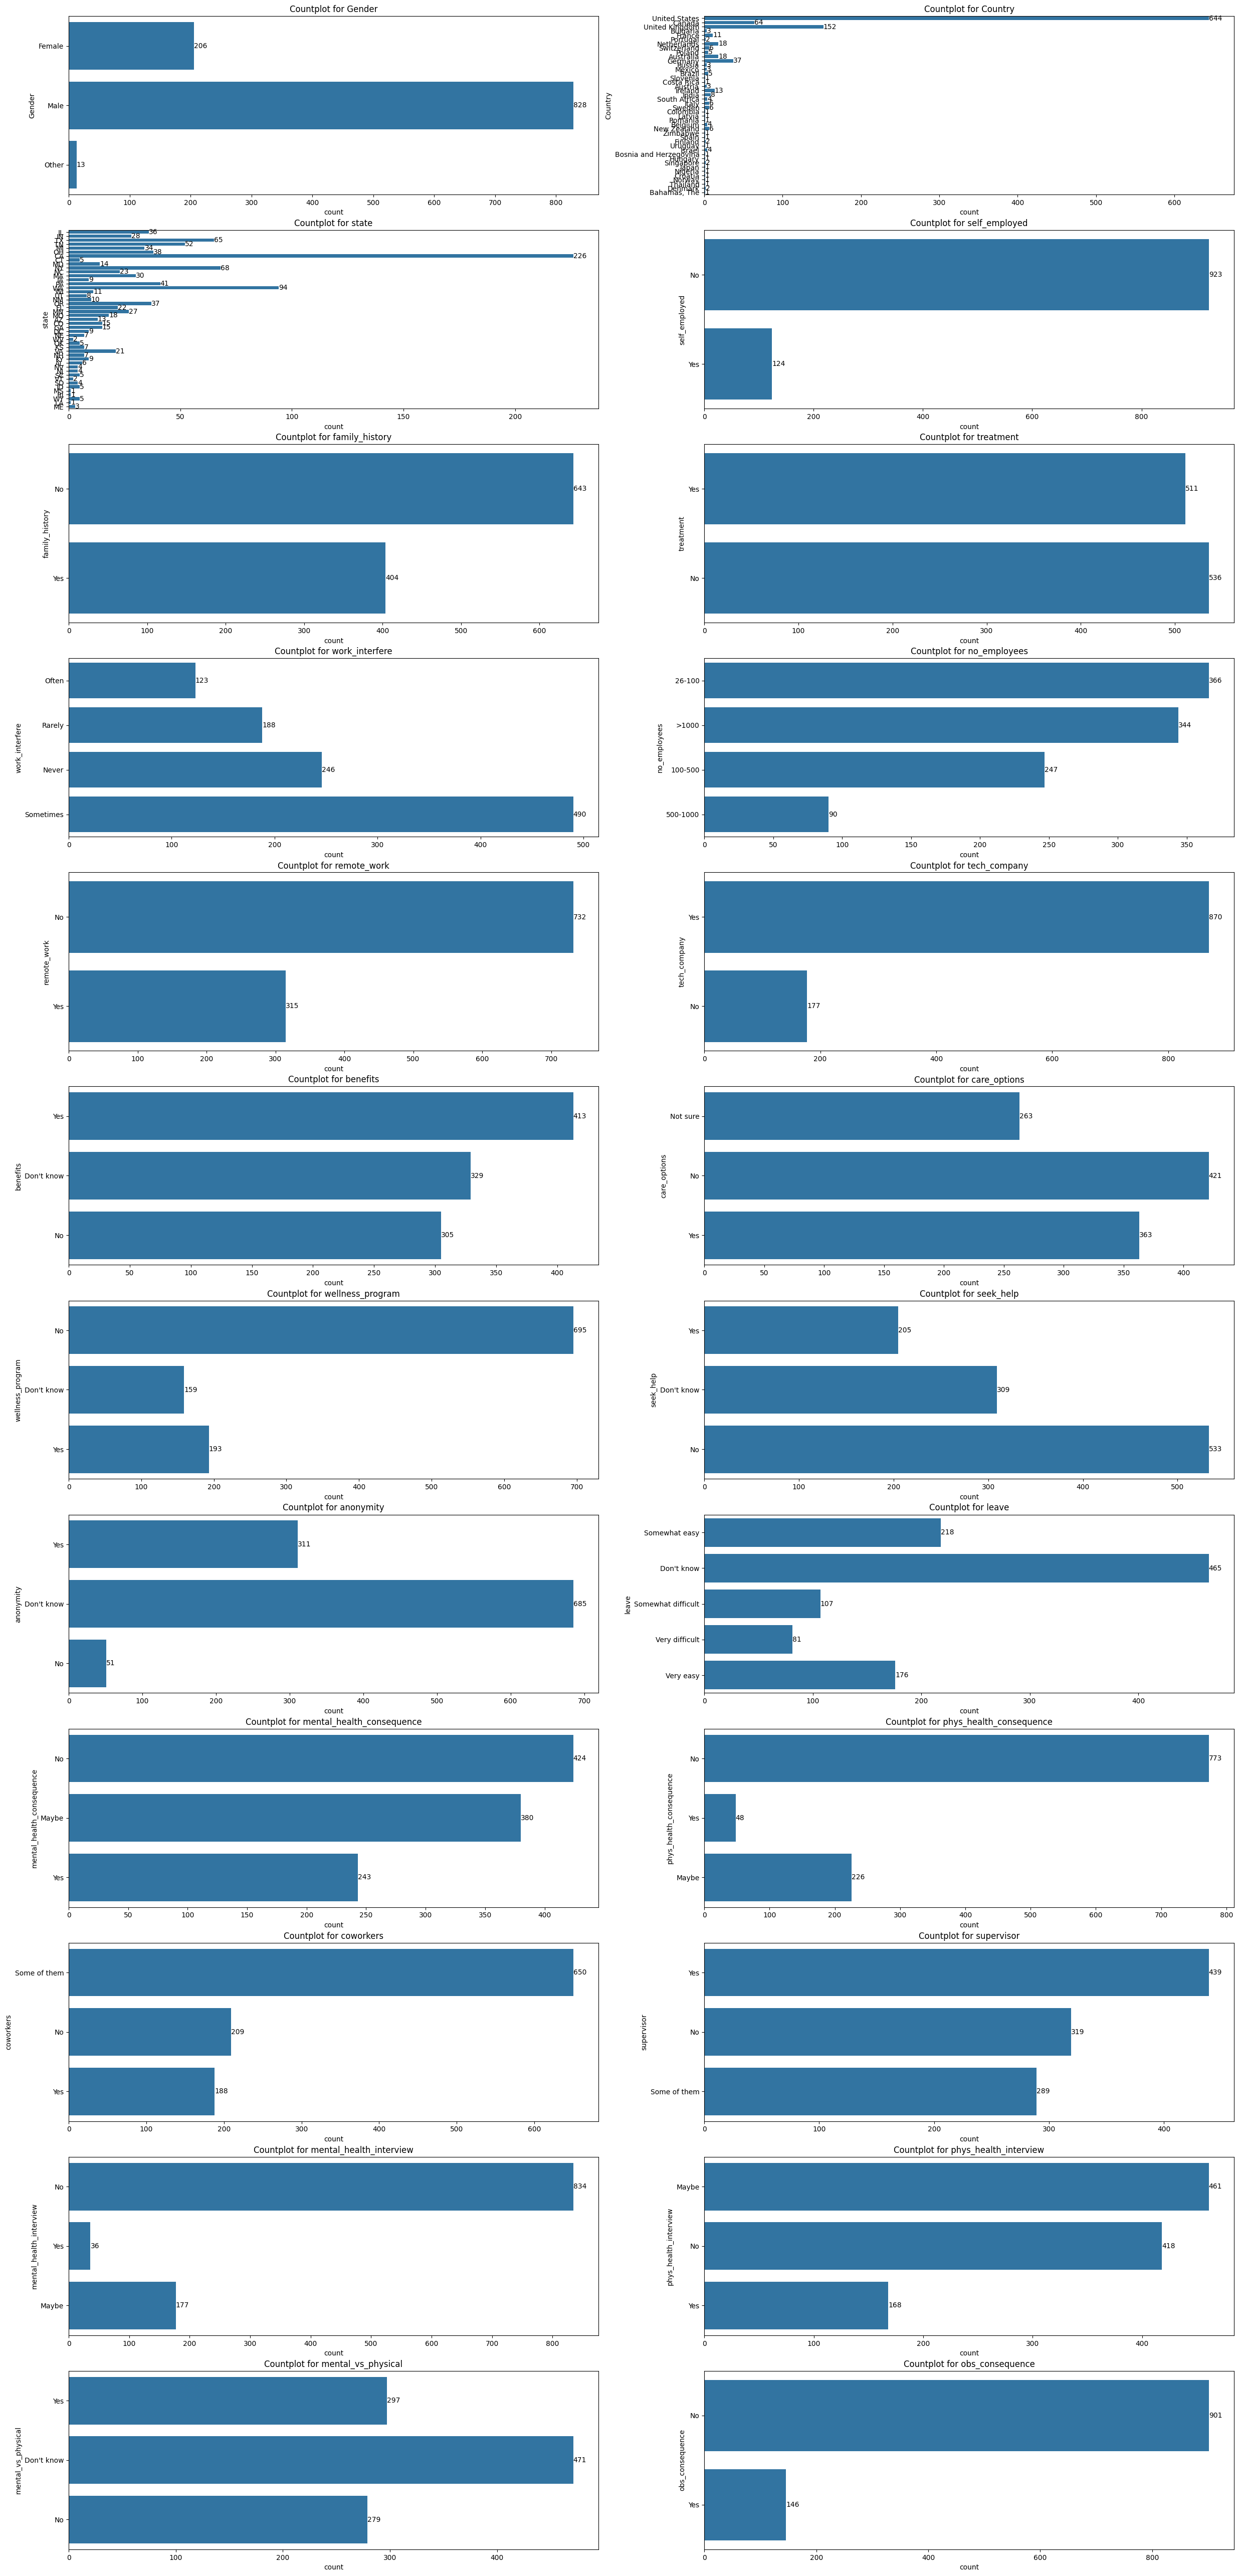

In [ ]:
plt.figure(figsize=(30,110))
for i in range(len(clm_train)):
  plt.subplot(20,2,i+1)
  ax=sb.countplot(emp_train1[clm_train[i]])
  ax.bar_label(ax.containers[0])
  plt.title(f'Countplot for {clm_train[i]}')


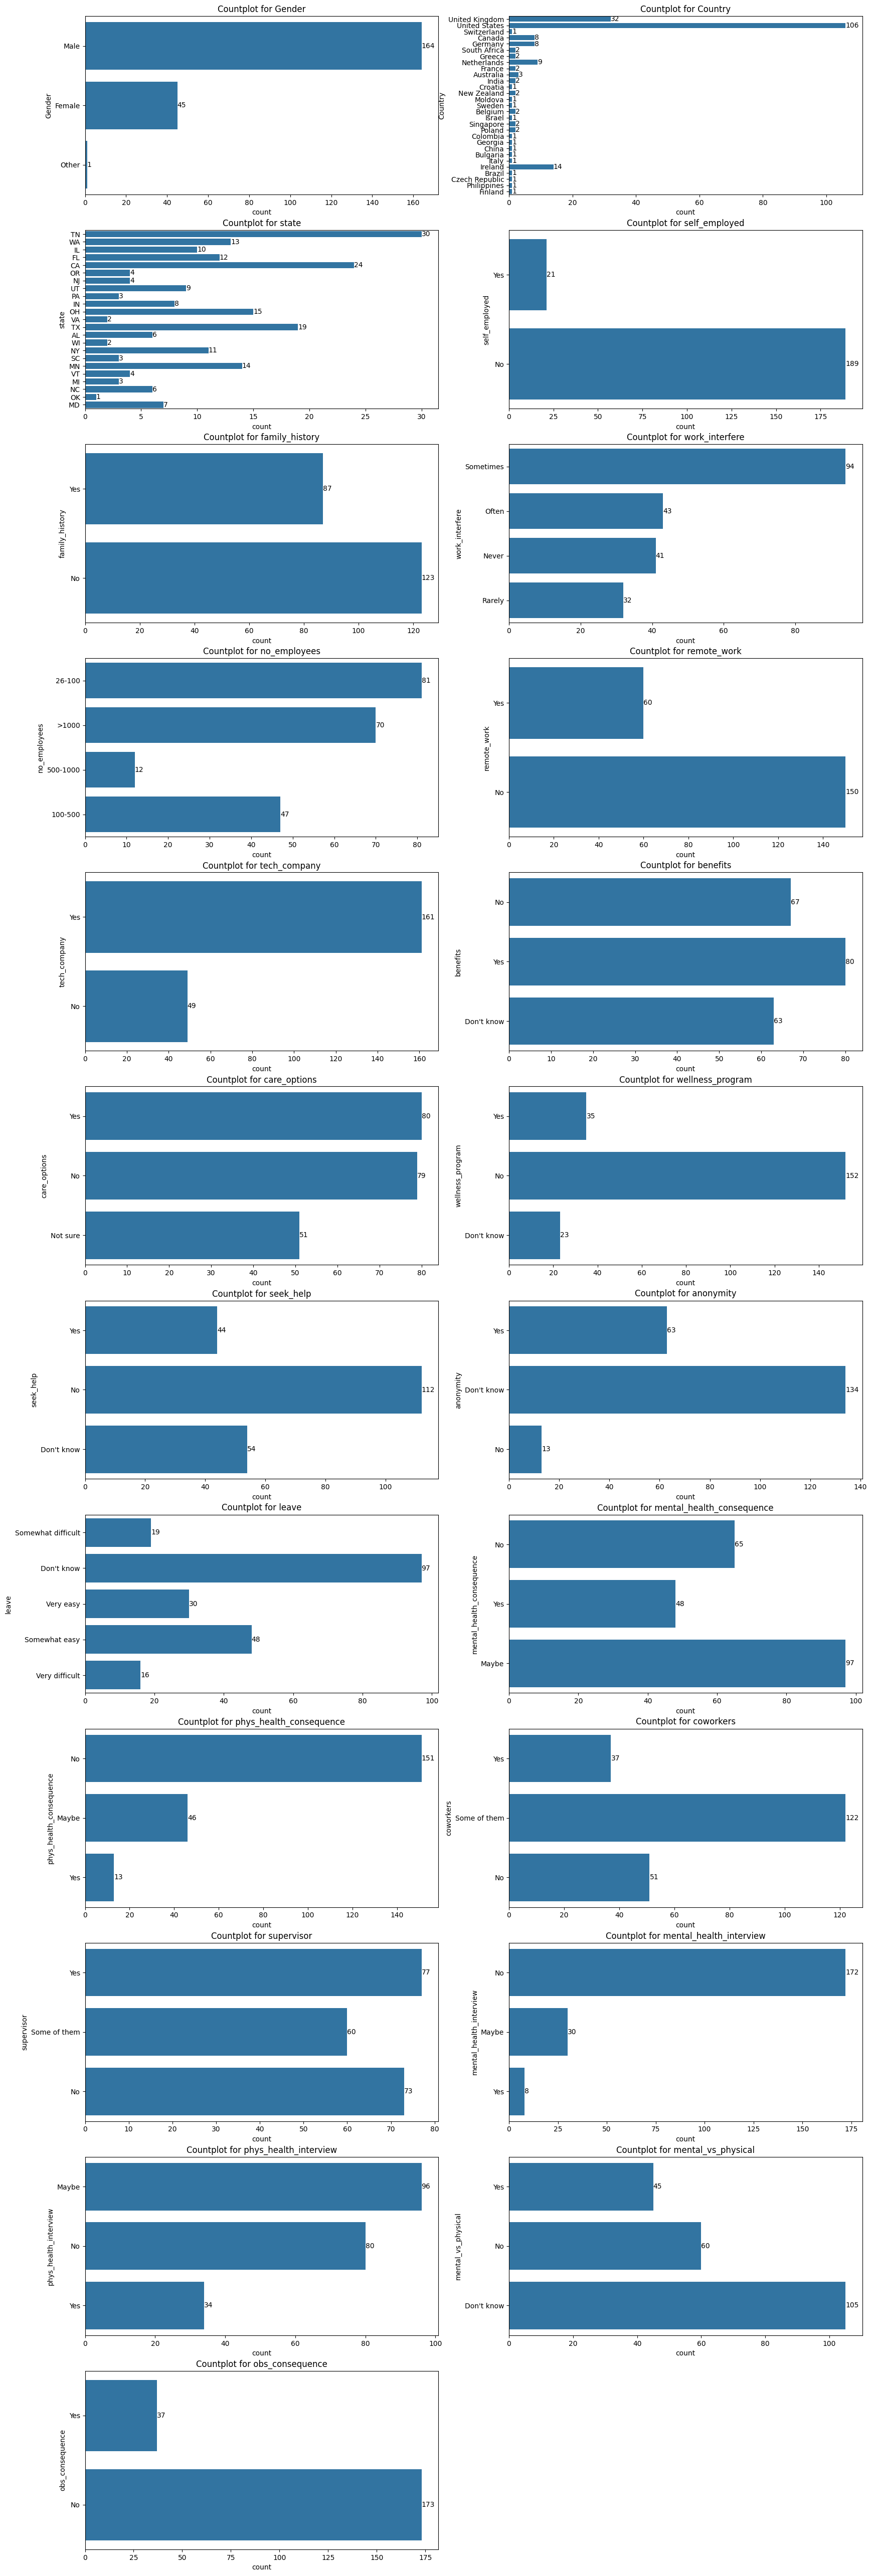

In [ ]:
plt.figure(figsize=(20,110))
for i in range(len(clm_test)):
  plt.subplot(20,2,i+1)
  ax=sb.countplot(emp_test1[clm_test[i]])
  ax.bar_label(ax.containers[0])
  plt.title(f'Countplot for {clm_test[i]}')



In [ ]:
clm_train_date=['Year', 'Qtr', 'Month','Week_Day', 'Hour', 'IsWeekend', 'Hr_Part']

for i in clm_train_date:
  print(emp_train1[i].value_counts())
  print('\n')

Year
2014    1047
Name: count, dtype: int64


Qtr
3    1047
Name: count, dtype: int64


Month
8    1047
Name: count, dtype: int64


Week_Day
2    614
3    330
4    103
Name: count, dtype: int64


Hour
12    145
11    122
15    110
14    101
13     89
17     77
16     73
9      59
10     52
22     26
18     24
19     21
21     18
8      18
3      15
4      14
23     13
2      12
20     11
0      11
1      10
5       9
6       9
7       8
Name: count, dtype: int64


IsWeekend
0    1047
Name: count, dtype: int64


Hr_Part
2    595
1    268
3    113
0     71
Name: count, dtype: int64




In [ ]:
clm_test_data=['Year', 'Qtr', 'Month','Week_Day', 'Hour', 'IsWeekend', 'Hr_Part']

for i in clm_test_data:
  print(emp_test1[i].value_counts())
  print('\n')

Year
2014    141
2015     68
2016      1
Name: count, dtype: int64


Qtr
3    140
1     49
2     11
4     10
Name: count, dtype: int64


Month
8     89
9     49
2     48
11     5
4      5
5      5
10     3
12     2
7      2
1      1
6      1
Name: count, dtype: int64


Week_Day
5    69
4    62
0    25
1    22
3    14
6    12
2     6
Name: count, dtype: int64


Hour
9     22
11    20
12    14
16    13
4     13
14    12
8     12
13    11
17    11
20    11
21    10
10     9
15     8
5      7
19     6
18     6
6      6
23     4
22     4
3      3
0      3
7      2
1      2
2      1
Name: count, dtype: int64


IsWeekend
0    129
1     81
Name: count, dtype: int64


Hr_Part
1    71
2    69
3    41
0    29
Name: count, dtype: int64




## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
clm_train_enc=['Country', 'state', 'treatment']
clm_test_enc=['Country', 'state']

for i in clm_train_enc:
  le=LabelEncoder()
  emp_train1[i]=le.fit_transform(emp_train1[i])

for i in clm_test_enc:
  le=LabelEncoder()
  emp_test1[i]=le.fit_transform(emp_test1[i])

In [ ]:
clm_dm=emp_train1.dtypes[emp_train1.dtypes=='object'].index

emp_train_dm=pd.get_dummies(data=emp_train1,columns=clm_dm,drop_first=True,dtype=int)
emp_test_dm=pd.get_dummies(data=emp_test1,columns=clm_dm,drop_first=True,dtype=int)

## Select x and y (train data), x(test data)

In [ ]:
emp_train_x=emp_train_dm.drop(columns=['Date_Time','treatment'])
emp_train_y=emp_train_dm['treatment']

In [ ]:
emp_test_x=emp_test_dm.drop(columns=['Date_Time'])

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
emp_train_x=pd.DataFrame(ss.fit_transform(emp_train_x),columns=emp_train_x.columns)
emp_test_x=pd.DataFrame(ss.transform(emp_test_x),columns=emp_test_x.columns)

## Evaluation Matrix

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [ ]:
def Matrics(y_test,y_pred):
  print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
  print('\n')
  print('Classification Report: \n',classification_report(y_test,y_pred))

In [ ]:
def Score(y_test,y_pred):
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('F1 Score:',f1_score(y_test,y_pred))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression()
lg.fit(emp_train_x,emp_train_y)

LogisticRegression()

In [ ]:
y_pd_lg=lg.predict(emp_test_x)

In [ ]:
Matrics(emp_train_y,lg.predict(emp_train_x))

Confusion Matrix: 
 [[422 114]
 [114 397]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       536
           1       0.78      0.78      0.78       511

    accuracy                           0.78      1047
   macro avg       0.78      0.78      0.78      1047
weighted avg       0.78      0.78      0.78      1047



In [ ]:
Score(emp_train_y,lg.predict(emp_train_x))

Accuracy Score: 0.7822349570200573
F1 Score: 0.776908023483366


In [ ]:
print('Accuracy Score: ',accuracy_score(emp_train_y,lg.predict(emp_train_x)))

Accuracy Score:  0.7822349570200573


In [ ]:
# Finding Best Threshold

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
y_pd_lg_prob=lg.predict_proba(emp_train_x)[:,1]

In [ ]:
tps,fps,thres=roc_curve(emp_train_y,y_pd_lg_prob)
roc=roc_auc_score(emp_train_y,y_pd_lg_prob)

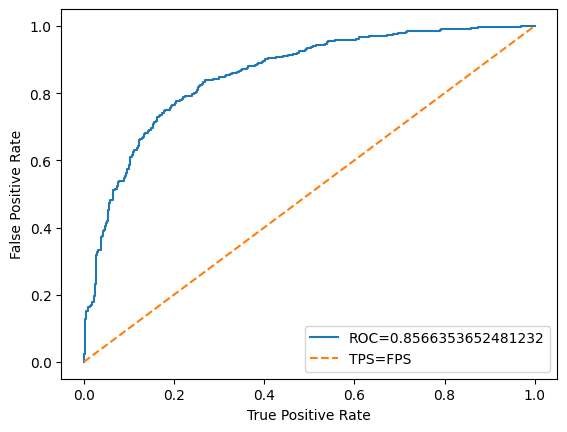

In [ ]:
plt.plot(tps,fps,label=f'ROC={roc}')
plt.plot([0,1],[0,1],linestyle='--',label='TPS=FPS')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
best_thres=thres[np.argmax(tps*(1-fps))]
y_pd_lg_final=np.where(y_pd_lg_prob>best_thres,1,0)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
## Hyperparametric Tuning using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param={'criterion':['gini','entropy'], 'max_depth':np.arange(30,50),
       'min_samples_split':np.arange(30,50)}

In [ ]:
gs_dt=GridSearchCV(dt,param_grid=param,scoring='accuracy')
gs_dt.fit(emp_train_x,emp_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                         'min_samples_split': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])},
             scoring='accuracy')

In [ ]:
print('Best Parameter: ',gs_dt.best_params_)

Best Parameter:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 48}


In [ ]:
## Using Best Parameter

In [ ]:
dt_f=DecisionTreeClassifier(**gs_dt.best_params_)
dt_f.fit(emp_train_x,emp_train_y )

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=48)

In [ ]:
y_pd_dt=dt_f.predict(emp_test_x)

In [ ]:
Matrics(emp_train_y,dt_f.predict(emp_train_x))

Confusion Matrix: 
 [[425 111]
 [109 402]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       536
           1       0.78      0.79      0.79       511

    accuracy                           0.79      1047
   macro avg       0.79      0.79      0.79      1047
weighted avg       0.79      0.79      0.79      1047



In [ ]:
Score(emp_train_y,dt_f.predict(emp_train_x))

Accuracy Score: 0.789875835721108
F1 Score: 0.78515625


In [ ]:
print('Accuracy Score: ',accuracy_score(emp_train_y,dt_f.predict(emp_train_x)))

Accuracy Score:  0.789875835721108


In [ ]:
## Plot tree and Export Text

In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
f_name=emp_train_x.columns.to_list()
c_name=[str(i) for i in  emp_train_y.unique()]

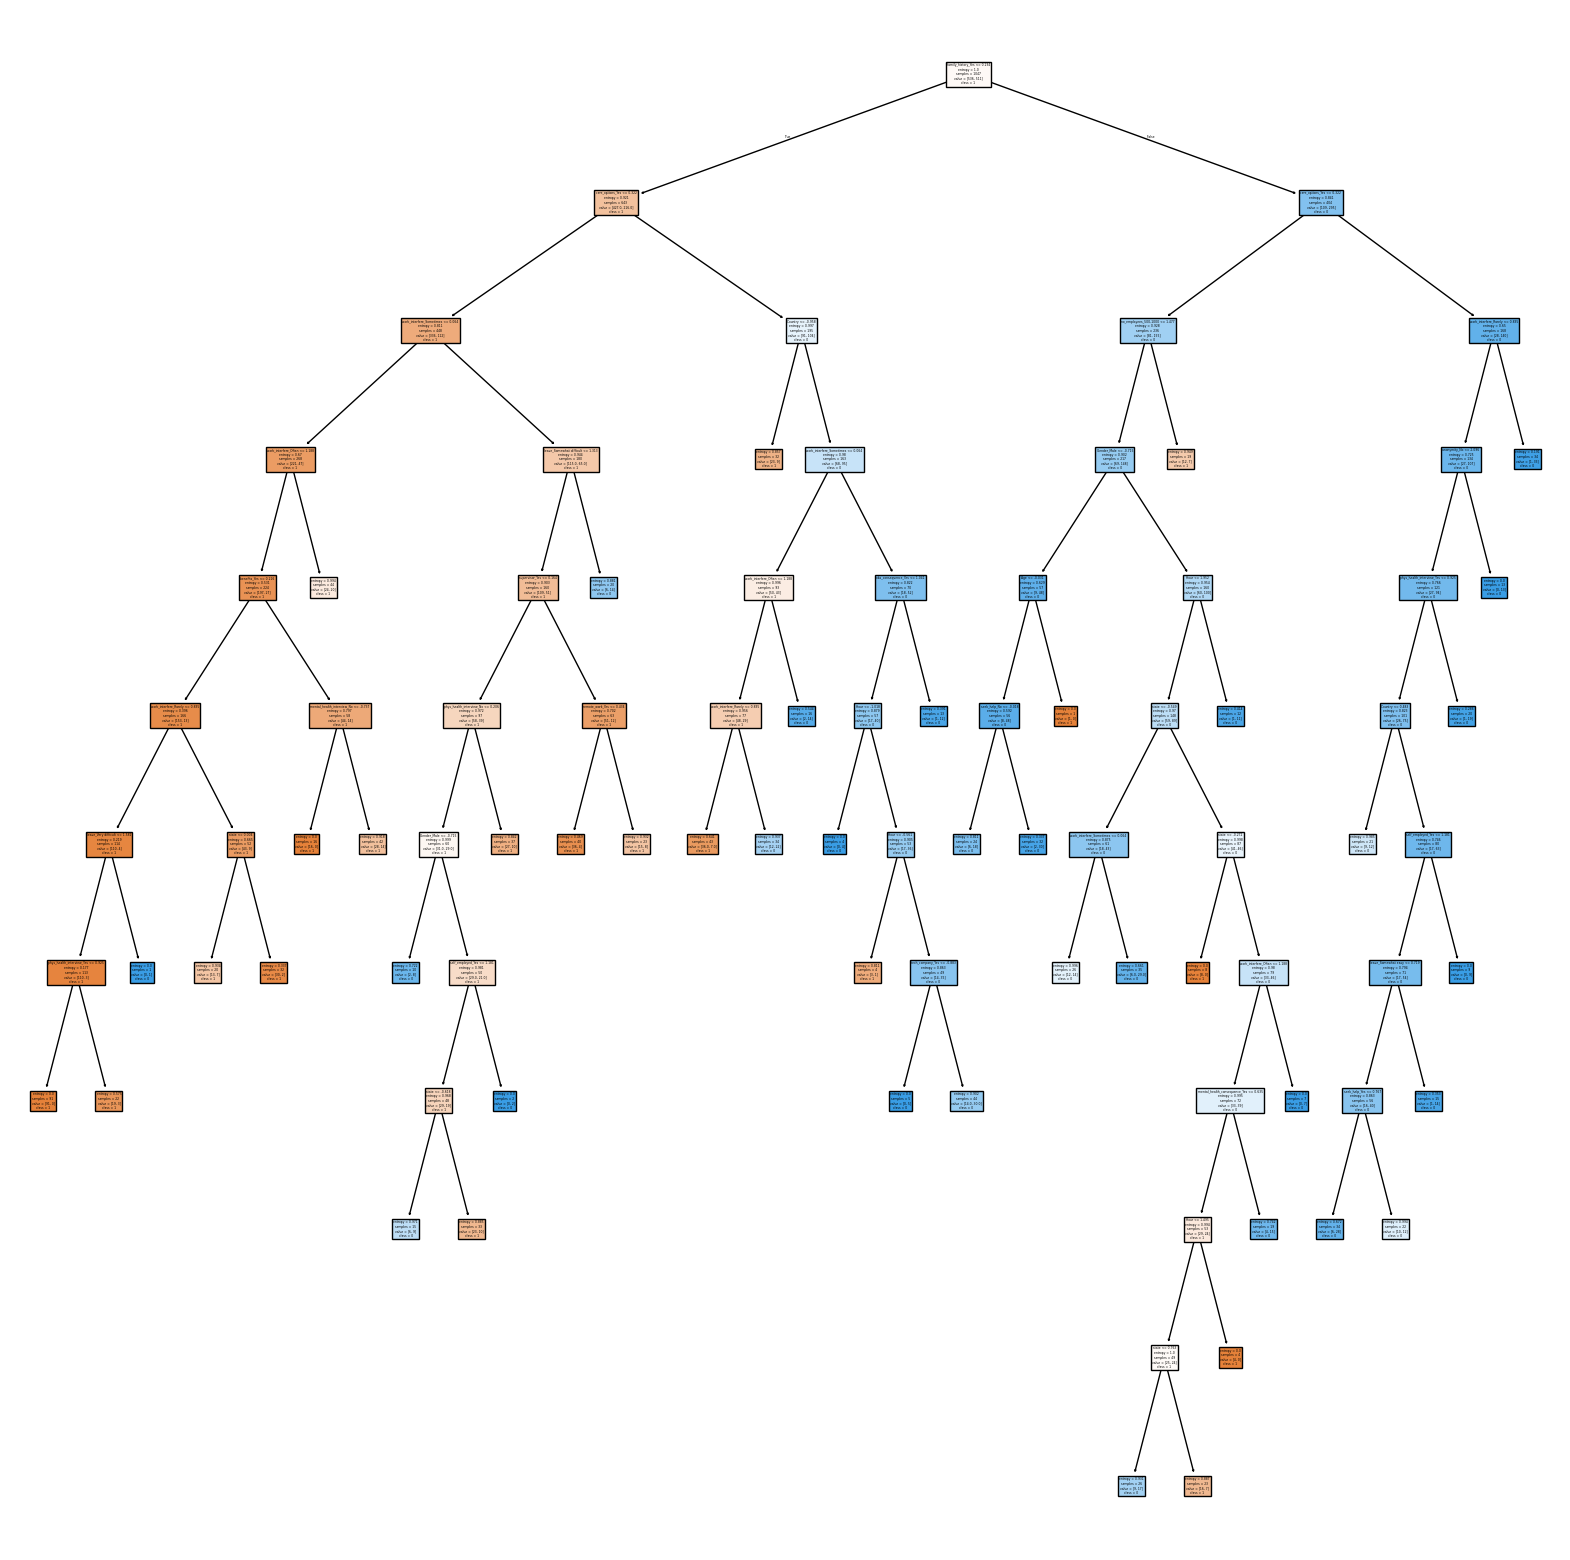

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(dt_f,feature_names=f_name,class_names=c_name,filled=True )
plt.show()

In [354]:
print(export_text(dt_f,feature_names=f_name,class_names=c_name))

|--- family_history_Yes <= 0.23
|   |--- care_options_Yes <= 0.32
|   |   |--- work_interfere_Sometimes <= 0.06
|   |   |   |--- work_interfere_Often <= 1.19
|   |   |   |   |--- benefits_Yes <= 0.22
|   |   |   |   |   |--- work_interfere_Rarely <= 0.83
|   |   |   |   |   |   |--- leave_Very difficult <= 1.58
|   |   |   |   |   |   |   |--- phys_health_interview_Yes <= 0.93
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- phys_health_interview_Yes >  0.93
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- leave_Very difficult >  1.58
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- work_interfere_Rarely >  0.83
|   |   |   |   |   |   |--- state <= 0.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- state >  0.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- benefits_Yes >  0.22
|   |   |   |   |   |--- mental_health_interview_No <= -0.74
|   |   |   |   |   |   |--- clas

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
## Using Hyperparametric tuning Using Grid Search

In [ ]:
param_rf={'n_estimators':[70,80,90,100],
          'criterion':['gini','entropy'],
          'max_depth':np.arange(30,50),
          'min_samples_split':np.arange(30,50)}

In [ ]:
gs_rf=GridSearchCV(rf,param_grid=param_rf,scoring='accuracy')
gs_rf.fit(emp_train_x,emp_train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                         'min_samples_split': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                         'n_estimators': [70, 80, 90, 100]},
             scoring='accuracy')

In [344]:
print("Best Parameter",gs_rf.best_params_)

Best Parameter {'criterion': 'entropy', 'max_depth': 48, 'min_samples_split': 31, 'n_estimators': 80}


In [345]:
## Using Best Parameter

In [346]:
rf_f=RandomForestClassifier(**gs_rf.best_params_)
rf_f.fit(emp_train_x,emp_train_y)

RandomForestClassifier(criterion='entropy', max_depth=48, min_samples_split=31,
                       n_estimators=80)

In [347]:
y_pd_rf=rf_f.predict(emp_test_x)

In [348]:
Matrics(emp_train_y,rf_f.predict(emp_train_x))

Confusion Matrix: 
 [[434 102]
 [ 89 422]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       536
           1       0.81      0.83      0.82       511

    accuracy                           0.82      1047
   macro avg       0.82      0.82      0.82      1047
weighted avg       0.82      0.82      0.82      1047



In [349]:
Score(emp_train_y,rf_f.predict(emp_train_x))

Accuracy Score: 0.8175740210124164
F1 Score: 0.8154589371980676


In [350]:
print('Accuracy Score: ',accuracy_score(emp_train_y,rf_f.predict(emp_train_x)))

Accuracy Score:  0.8175740210124164


In [351]:
## Plot tree and Export Text (For a random tree , e.g. 40th tree)

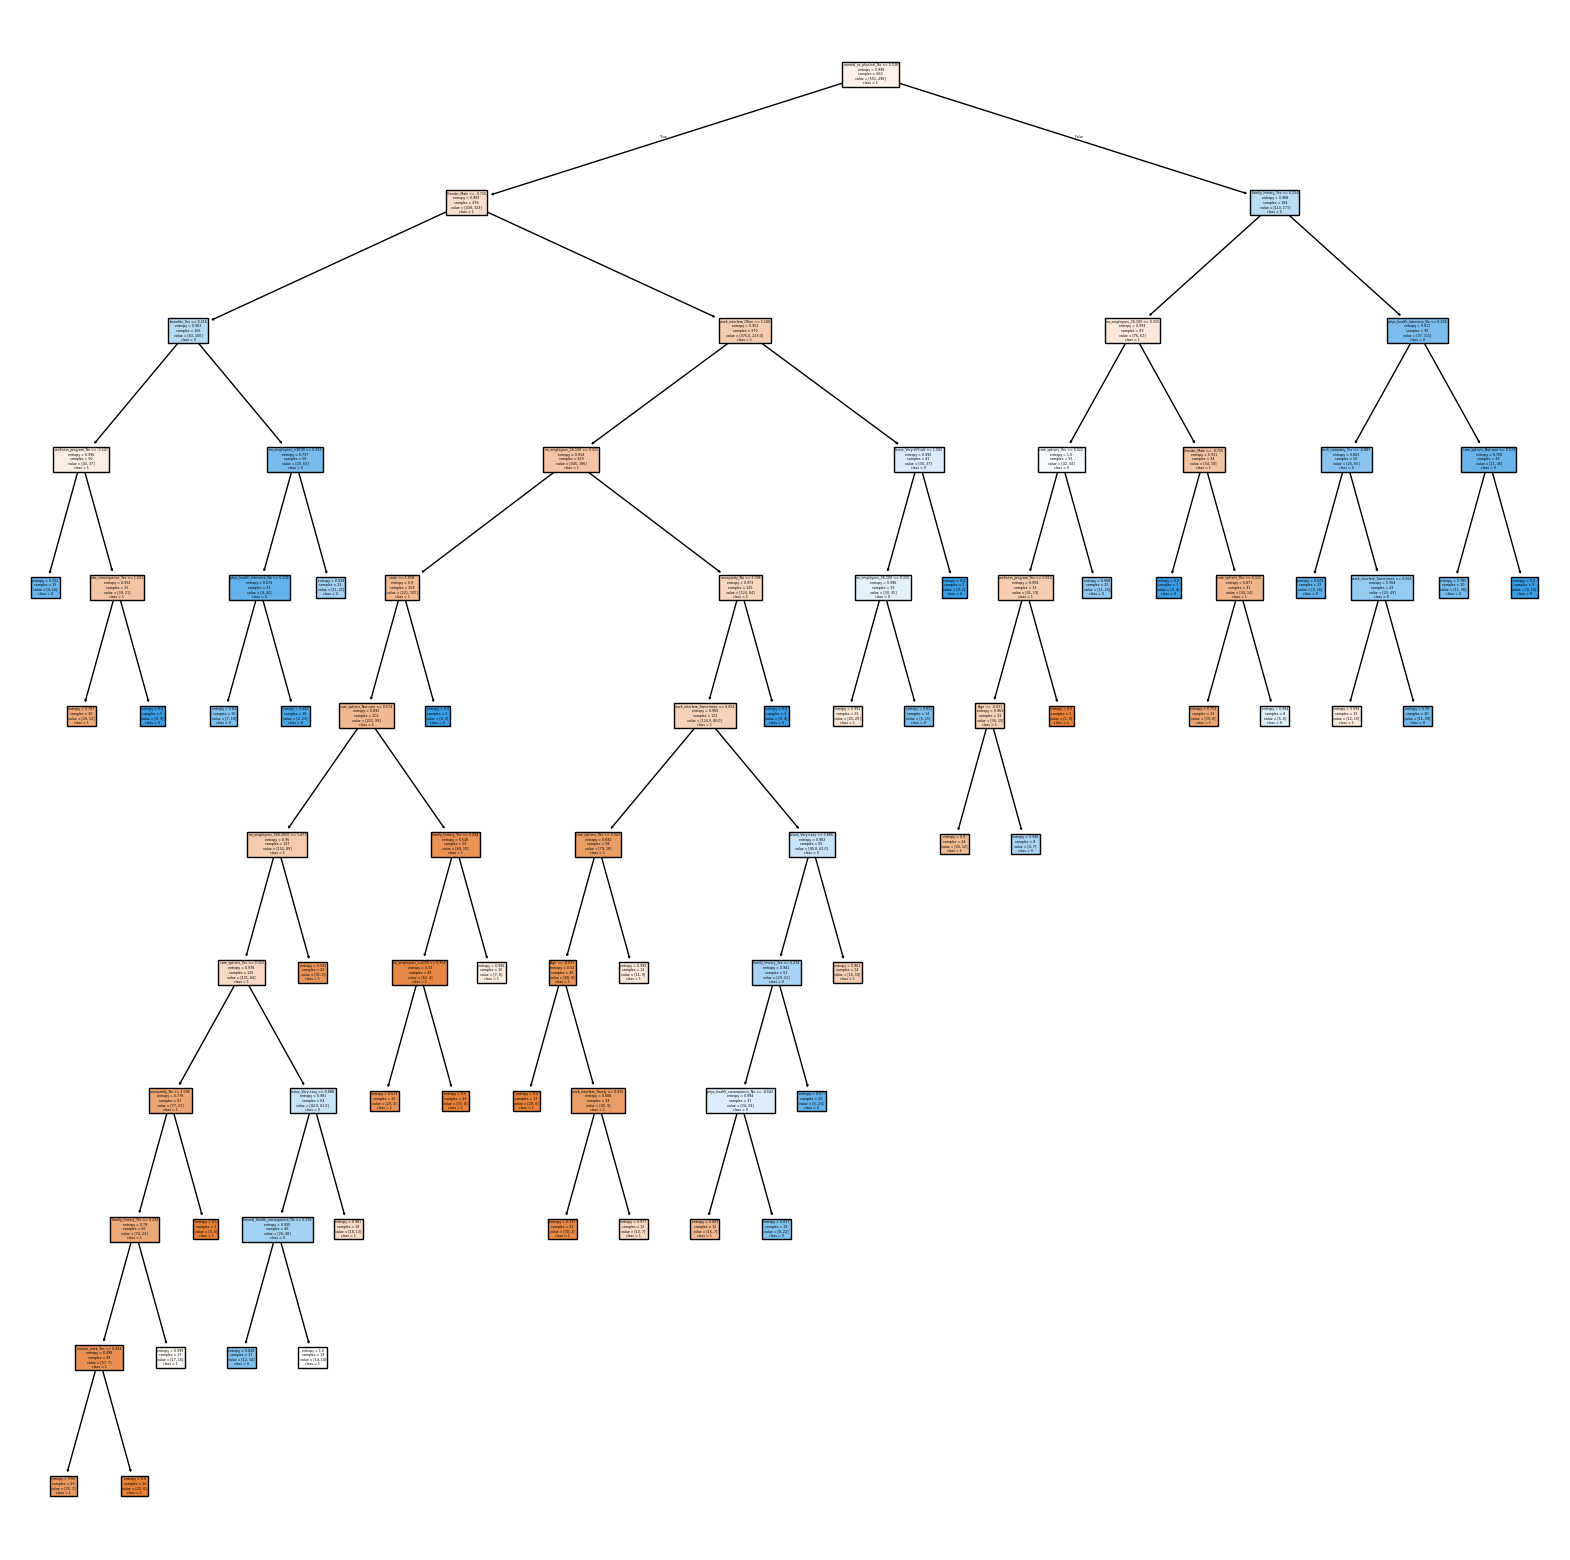

In [352]:
plt.figure(figsize=(20,20))
plot_tree(rf_f.estimators_[40],feature_names=f_name,class_names=c_name,filled=True )
plt.show()

In [355]:
print(export_text(rf_f.estimators_[40],feature_names=f_name,class_names=c_name))

|--- mental_vs_physical_No <= 0.53
|   |--- Gender_Male <= -0.72
|   |   |--- benefits_Yes <= 0.22
|   |   |   |--- wellness_program_No <= -0.35
|   |   |   |   |--- class: 0
|   |   |   |--- wellness_program_No >  -0.35
|   |   |   |   |--- obs_consequence_Yes <= 1.04
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- obs_consequence_Yes >  1.04
|   |   |   |   |   |--- class: 0
|   |   |--- benefits_Yes >  0.22
|   |   |   |--- no_employees_>1000 <= 0.37
|   |   |   |   |--- phys_health_interview_No <= 0.21
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- phys_health_interview_No >  0.21
|   |   |   |   |   |--- class: 0
|   |   |   |--- no_employees_>1000 >  0.37
|   |   |   |   |--- class: 0
|   |--- Gender_Male >  -0.72
|   |   |--- work_interfere_Often <= 1.19
|   |   |   |--- no_employees_26-100 <= 0.32
|   |   |   |   |--- state <= 1.56
|   |   |   |   |   |--- care_options_Not sure <= 0.57
|   |   |   |   |   |   |--- no_employees_500-1000 <= 1.48
|   |   |   |   |  

## KNN Classifier

In [356]:
from sklearn.neighbors import KNeighborsClassifier

In [357]:
knn=KNeighborsClassifier()

In [358]:
## Using Best Parameter

In [359]:
param_knn={'n_neighbors':np.arange(5,100,2)}

In [360]:
gs_knn=GridSearchCV(knn,param_grid=param_knn,scoring='accuracy')
gs_knn.fit(emp_train_x,emp_train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71,
       73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             scoring='accuracy')

In [361]:
print('Best N_Neighbours:',gs_knn.best_params_)

Best N_Neighbours: {'n_neighbors': 15}


In [362]:
## Using best Parameter

In [363]:
knn_f=KNeighborsClassifier(**gs_knn.best_params_)
knn_f.fit(emp_train_x,emp_train_y)

KNeighborsClassifier(n_neighbors=15)

In [364]:
y_pd_knn=knn_f.predict(emp_test_x)

In [365]:
Matrics(emp_train_y,knn_f.predict(emp_train_x))

Confusion Matrix: 
 [[459  77]
 [233 278]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       536
           1       0.78      0.54      0.64       511

    accuracy                           0.70      1047
   macro avg       0.72      0.70      0.69      1047
weighted avg       0.72      0.70      0.70      1047



In [366]:
Score(emp_train_y,knn_f.predict(emp_train_x))

Accuracy Score: 0.7039159503342884
F1 Score: 0.6420323325635104


In [367]:
print('Accuracy Score: ',accuracy_score(emp_train_y,knn_f.predict(emp_train_x)))

Accuracy Score:  0.7039159503342884


## Model Evaluation (Accuracy Score)

In [368]:
acc_scr=pd.DataFrame()

In [369]:
acc_scr['Model Name']=['Logistic Regression','Decision Tree','Random Forest','KNN']
acc_scr['Accuracy Score']=[accuracy_score(emp_train_y,lg.predict(emp_train_x)),
                          accuracy_score(emp_train_y,dt_f.predict(emp_train_x)),
                          accuracy_score(emp_train_y,rf_f.predict(emp_train_x)),
                          accuracy_score(emp_train_y,knn_f.predict(emp_train_x))]

In [370]:
acc_scr.sort_values(by='Accuracy Score',ascending=False,inplace=True)
acc_scr

,Model Name,Accuracy Score
2,Random Forest,0.817574
1,Decision Tree,0.789876
0,Logistic Regression,0.782235
3,KNN,0.703916


In [371]:
## Best Models picked are : Random Forest, Decision Tree and Logistic Regression

# Note:- Since KNN have low Accuracy Score, so not recommended to pick it up

## Extract prediction values from all four models

In [377]:
## Random Forest

yn_pd_rf=np.where(y_pd_rf==1,'Yes','No')

rf_res=pd.DataFrame(yn_pd_rf,columns=['RF Prediction'])
rf_res.to_csv('Random Forest Result.csv',index=True)

In [379]:
## Decision Tree

yn_pd_dt=np.where(y_pd_dt==1,'Yes','No')

dt_res=pd.DataFrame(yn_pd_dt,columns=['DT Prediction'])
dt_res.to_csv('Decision Tree Result.csv',index=True)

In [380]:
## Logistic Regression

yn_pd_lg_final=np.where(y_pd_lg_final==1,'Yes','No')

lg_res=pd.DataFrame(yn_pd_lg_final,columns=['LG Prediction'])
lg_res.to_csv('Logistic Regression Result.csv',index=True)

In [381]:
## KNN Classifier (Not Recommended)

yn_pd_knn=np.where(y_pd_knn==1,'Yes','No')

knn_res=pd.DataFrame(yn_pd_knn,columns=['KNN Prediction'])
knn_res.to_csv('KNN Result (Not Recommended).csv',index=True)

## Save the Model


In [382]:
import pickle

In [383]:
# Random Forest
with open('Random_Forest_model.pkl', 'wb') as file:
    pickle.dump(rf_f, file)

In [384]:
# Decision Tree
with open('Decision_Tree_model.pkl', 'wb') as file:
    pickle.dump(dt_f, file)